# Metody Numeryczne - Labolatorium nr. 3 (Aproksymacja) #

**Imię i Nazwisko:** Bartosz Polak  
**Numer Indeksu:** 267626  
**Kierunek:** Mechatronika  
**Data:** 14.11.2024  

---

## 1. Wstęp
<div style="text-align: justify; line-height: 1.6; margin: 10px;">
Tematem dzisiejszego labolatorum była aproksymacja. Aby przybliżyć (słowo klucz) istotę aproksymacji jakiś danych najpierw należałoby przypomnieć metody interpolacji w poprzednich zajęć i zastanowić się dlaczego używać innych algorytmów do przedstawiania funkcji na podstawie pewnych danych pomiarowych. Otóż podczas interpolacji funkcja interpolacyjna przechodziła przez wszystkie punkty z badanego zbioru, ma to oczywiście swoje plusy i minusy. Jeżeli dane cechują się bardzo dużym uporządkowaniem, co w rzeczywistym świecie jest nieczęstym przypadkiem. Zazwyczaj dane otrzymane są w pewnym stopniu zaburzone i posiadają pewne błędy, jakiś rozrzut wobec lini funkcji, która by opisywała dane zjawisko. W takim przypadku można posłużyć się aproksymacyjną czyli funkcją która przybliża jak najbardziej charakter otrzymanych danych. Jest ona przeprowadzana w taki sposób, aby odległość do punktów w każdym miejscu była jak najmniejsza. Tak samo jak w przypadku interpolacji funkcja aprolsymacyjna może być zaróno liniowa, kwadratowa lub wielomianowa, można również zrobić funkcję skłądaną. 
</div>

## 2. Zadania

Aby przedstawić istotę zagadnienia zostanie przeprowadzony proces aproksymacji danych z pomiaru temperatury. Na początek należy zaimportować dane, w tym przypadku tak samo jak podczas pierwszego labolatorium posłużę się biblioteką pandas.

In [62]:
import pandas as pd
import numpy as np

# Wczytanie pliku z uwzględnieniem średnika jako seperatora, oraz pominięcie pierwszych 4 wierszy, które nie posiadają intresujących nas danych
df = pd.read_csv('Outdoor_temperature_2017-09.csv', delimiter=';', skiprows=4)

# Zapisa odpowienich danych z kolumn w listy, 
timeStamp = df.iloc[:, 0].tolist()
data = df.iloc[:, 1].tolist()
temperatura = df.iloc[:, 2].tolist()

# Wyświetlenie pierwszych kilku wierszy
df.head()

,1504216976,2017/09/01 00:02:56,21.4
0,1504217283,2017/09/01 00:08:03,21.3
1,1504217540,2017/09/01 00:12:20,21.1
2,1504217847,2017/09/01 00:17:27,21.1
3,1504218155,2017/09/01 00:22:35,20.9
4,1504218462,2017/09/01 00:27:42,20.9


Następnie wwybieramy interesujący nas przedział czasu, z którego będziemy wyświetlać dane. Oraz przedstawiamy wykres pokazujący jak zmienia się temperatura.

In [70]:
# Wybieramy interesujący nas przedział dat
# Ustawienia zakresu dat (a i b) jako stringi
t_1 = '2017/09/12 08:00:00'
t_2 = '2017/09/12 18:00:00'

df = pd.DataFrame(data={"data": data, "temperatura": temperatura})

# Konwersja kolumny z datami do specjalnego typu datetime
df['data'] = pd.to_datetime(df['data'])

# Ustawienie kolumny 'data' jako indeks
df.set_index('data', inplace=True)

# Konwersja kolumny 'temperatura' na typ float
df['temperatura'] = df['temperatura'].astype(float)

# wyświetlenie pierwszych kilku wierszy
df.head()

,temperatura
data,
2017-09-01 00:08:03,21.3
2017-09-01 00:12:20,21.1
2017-09-01 00:17:27,21.1
2017-09-01 00:22:35,20.9
2017-09-01 00:27:42,20.9


<Axes: xlabel='data'>

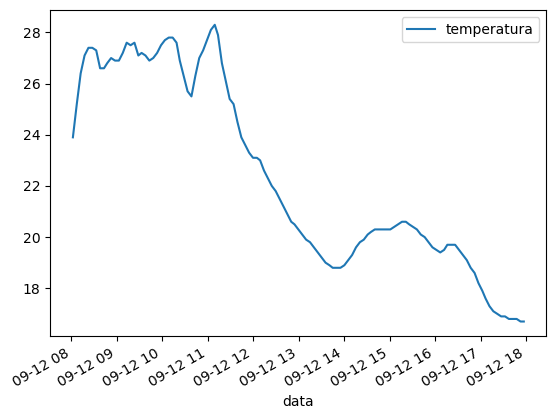

In [71]:
# Rysowanie wykresu z wcześniej ustalonego przedziału dat
df[t_1:t_2].plot()

Następnie przeprowadzimy aproksymacje liniową tych danych 

Aproksymacja: y = -0.10x + 349.76


<Axes: xlabel='data'>

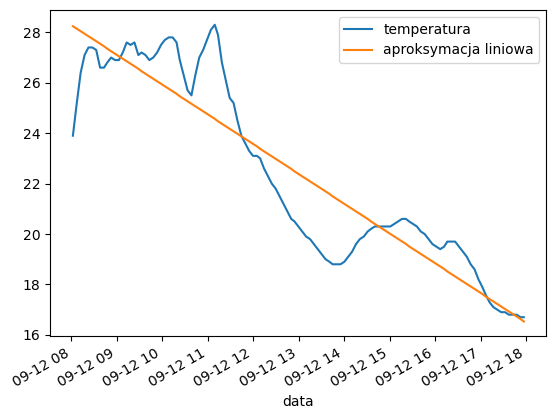

In [72]:
from scipy.optimize import curve_fit

# Definicja funkcji liniowej
def linear(x, a, b):
    return a * x + b

# Zmiana czasu na index, oraz wybranie przedziału interesujących nas dat
df['index'] = np.arange(1, len(df) + 1)
df_selected_time = df[t_1:t_2]

# Dopasowanie funkcji liniowej do danych
params, covariance = curve_fit(linear, df_selected_time['index'], df_selected_time['temperatura'])

# Współczynniki (a - nachylenie, b - przecięcie)
a, b = params
print(f'Aproksymacja: y = {a:.2f}x + {b:.2f}')

# Obliczenie wartości aproksymacji
df['aproksymacja liniowa'] = linear(df['index'], *params)

df[t_1:t_2].plot(y=['temperatura', 'aproksymacja liniowa'])


Teraz dla przykładu pokazanie innych typów funkcji aproksymacji

Współczynniki funkcji kwadratowej: [ 1.46937007e-04 -1.06846085e+00  1.94779201e+03]
Współczynniki funkcji wielomianowej: [ 3.63374368e-12 -3.18164751e-07  3.82057270e-03 -1.83396080e+01
  3.98040479e+04 -3.26251804e+07]


<Axes: xlabel='data'>

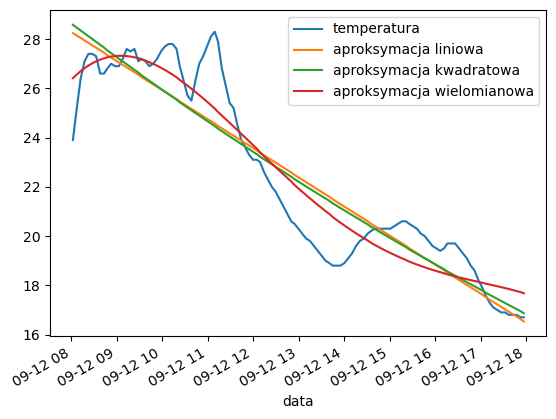

In [ ]:
# Definicja funkcji kwadratowej
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Definicja funkcji wielomianowej (5 stopnia) 
def polynomial(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f



# Dopasowanie funkcji kwadratowej do danych
params_quadratic, covariance = curve_fit(quadratic, df_selected_time['index'], df_selected_time['temperatura'])

# Dopasowanie funkcji wielomianowej do danych
params_polynomial, covariance = curve_fit(polynomial, df_selected_time['index'], df_selected_time['temperatura'])

# Współczynniki funkcji kwadratowej
print("Współczynniki funkcji kwadratowej:", params_quadratic)

# Współczynniki funkcji wielomianowej
print("Współczynniki funkcji wielomianowej:", params_polynomial)

# Obliczenie wartości aproksymacji
df['aproksymacja kwadratowa'] = quadratic(df['index'], *params_quadratic)
df['aproksymacja wielomianowa'] = polynomial(df['index'], *params_polynomial)

# Wykres
df[t_1:t_2].plot(y=['temperatura', 'aproksymacja liniowa', 'aproksymacja kwadratowa', 'aproksymacja wielomianowa'])



Na koniec jeszcze przedstawienie aproksymacji przy użyciu funkcji spline przy wykożystaniu wbudowanej funkcji w scipy "UnivariateSpline"

<Axes: xlabel='data'>

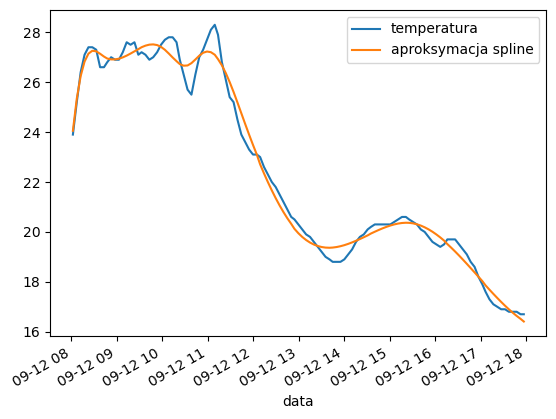

In [ ]:
from scipy.interpolate import UnivariateSpline

# Na koniec Aproksymacja przy pomocy funkcji spline
# parametr s określa stopnień wygładzenia przy s = 0, funkcja spline jest funkcją interpolacyjną i przechodzi przez wszystkie punkty danych 
spline = UnivariateSpline(df_selected_time['index'], df_selected_time['temperatura'], s=20)

# Obliczenie wartości aproksymacji spline
df['aproksymacja spline'] = spline(df['index'])

# Wykres
df[t_1:t_2].plot(y=['temperatura', 'aproksymacja spline'])

## 3. Wnioski
<div style="text-align: justify; line-height: 1.6; margin: 10px;">
W sprawozdaniu została przedstawiona idea funkcji aproksymacyjnych oraz jej praktyczne zastosowanie. Zostały ukazane różne rodzaje aproksymacji w tym liniowa, kwadratowa, wielomianowa, oraz spline. Każda z przedstawionych funkcji ma swoje zastosowania i od danych zależy jaką najlepiej dobrać i która posiada najlepsze dopasowanie do posiadanego zbioru punktów pomiarowych. W przykładzie pokazanym w sprawozdaniu (dla danych zakresów czasowych) najlepeij przybliżającą rzeczywstość jest metoda spline. 
</div>